In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and clean dataframes

#### User information table

In [2]:
users = pd.read_csv("takehome_users.csv", header=0, parse_dates=True, infer_datetime_format=True, 
                    encoding = "ISO-8859-1", engine='python')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
users[users.duplicated(keep=False)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [5]:
users.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

create a "has logged in" column

In [6]:
users['last_session_creation_time'].fillna(0, inplace=True)

In [7]:
users['has_logged_in'] = users['last_session_creation_time'].apply(lambda x: 1 if x!=0 else x).astype(int)

dropping some unimportant columns

In [8]:
to_drop = ['name', 'email', 'last_session_creation_time', 'invited_by_user_id']

In [9]:
user_info = users.drop(columns=to_drop)

In [10]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   object_id                   12000 non-null  int64 
 1   creation_time               12000 non-null  object
 2   creation_source             12000 non-null  object
 3   opted_in_to_mailing_list    12000 non-null  int64 
 4   enabled_for_marketing_drip  12000 non-null  int64 
 5   org_id                      12000 non-null  int64 
 6   has_logged_in               12000 non-null  int32 
dtypes: int32(1), int64(4), object(2)
memory usage: 609.5+ KB


In [11]:
user_info['creation_time'] = pd.to_datetime(user_info.creation_time)

In [12]:
user_info.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,has_logged_in
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,1
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,1
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,1
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,1


In [13]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   has_logged_in               12000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 609.5+ KB


#### Logins table

In [14]:
logins = pd.read_csv("takehome_user_engagement.csv", parse_dates=True, infer_datetime_format=True)
logins.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [15]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [16]:
logins.visited.unique()

array([1], dtype=int64)

In [17]:
logins['time_stamp'] = pd.to_datetime(logins['time_stamp'])
logins = logins.sort_values(by='time_stamp').set_index('time_stamp')

In [18]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2012-05-31 08:20:06 to 2014-06-06 14:58:50
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [19]:
len(logins.user_id.unique())

8823

create a column for the user info table that indicates whether a user is an "adopted user" or not

In [20]:
logins.rolling('7d').sum()['visited']

time_stamp
2012-05-31 08:20:06       1.0
2012-05-31 15:47:36       2.0
2012-05-31 17:19:37       3.0
2012-05-31 21:58:33       4.0
2012-06-01 00:17:30       5.0
                        ...  
2014-06-04 23:32:13    3136.0
2014-06-04 23:34:04    3136.0
2014-06-04 23:46:31    3132.0
2014-06-04 23:56:26    3131.0
2014-06-06 14:58:50    2286.0
Name: visited, Length: 207917, dtype: float64

In [21]:
logins[logins.user_id==2].rolling('7d').sum()['visited'].values

array([1., 1., 1., 1., 2., 1., 1., 2., 3., 3., 2., 1., 2., 1.])

In [22]:
logins[logins.user_id==2].index.max()

Timestamp('2014-03-31 03:45:04')

In [23]:
def has_adopted(logins_df):
    '''take the custom logins dataframe and calculate whether a user has adopted the service, per the definition:
      a user who has logged into the product on three separate days in at least one seven day period , '''
    logins_dict = {}
    for user in logins_df.user_id.unique():
        user_dict = {}
        user_df = logins_df[logins_df.user_id==user]
        n_logins = user_df.rolling('7d').sum()['visited'].values
        n_logins = [n for n in n_logins if n >= 3]
        if len(n_logins)>0:
            user_dict['adopted']=1
        else:
            user_dict['adopted']=0
        user_dict['last_login'] = user_df.index.max()
        logins_dict[user] = user_dict
        
    return logins_dict
        

In [24]:
logins_dict = has_adopted(logins)

In [25]:
adopted_df = pd.DataFrame(logins_dict).T
adopted_df.head()

,adopted,last_login
10012,0,2012-05-31 08:20:06
3428,0,2012-11-13 15:47:36
9899,0,2012-05-31 17:19:37
1693,1,2014-05-12 21:58:33
6102,0,2012-06-15 00:17:30


In [26]:
user_info = user_info.merge(adopted_df, how='left', left_on='object_id', right_index=True)
user_info.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,has_logged_in,adopted,last_login
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,1,0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,1,1,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1,0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,1,0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,1,0,2013-01-22 10:14:20


In [27]:
user_info.adopted.fillna(0, inplace=True)

In [28]:
user_info['n_days_used'] = user_info.apply(lambda row: (row.last_login - row.creation_time).days, axis=1)

In [29]:
user_info['n_days_used'].fillna(0, inplace=True)

In [30]:
user_info.drop(columns=['creation_time', 'last_login'], inplace=True)

In [31]:
user_info.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

For now (at least) I'm going to turn the creation source values into integers. 

In [32]:
creation_source_mapper = {'GUEST_INVITE': 0, 
                          'ORG_INVITE': 1, 
                          'SIGNUP': 2, 
                          'PERSONAL_PROJECTS': 3,
                           'SIGNUP_GOOGLE_AUTH': 4}

In [33]:
user_info['creation_source'] = user_info.creation_source.map(creation_source_mapper)

In [35]:
len(user_info.org_id.unique())

417

In [36]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  int64  
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   has_logged_in               12000 non-null  int32  
 6   adopted                     12000 non-null  int64  
 7   n_days_used                 12000 non-null  float64
dtypes: float64(1), int32(1), int64(6)
memory usage: 703.2 KB


In [37]:
user_info.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,has_logged_in,adopted,n_days_used
0,1,0,1,0,11,1,0,0.0
1,2,1,0,0,1,1,1,136.0
2,3,1,0,0,94,1,0,0.0
3,4,0,0,0,1,1,0,1.0
4,5,0,0,0,193,1,0,5.0


### Data exploration

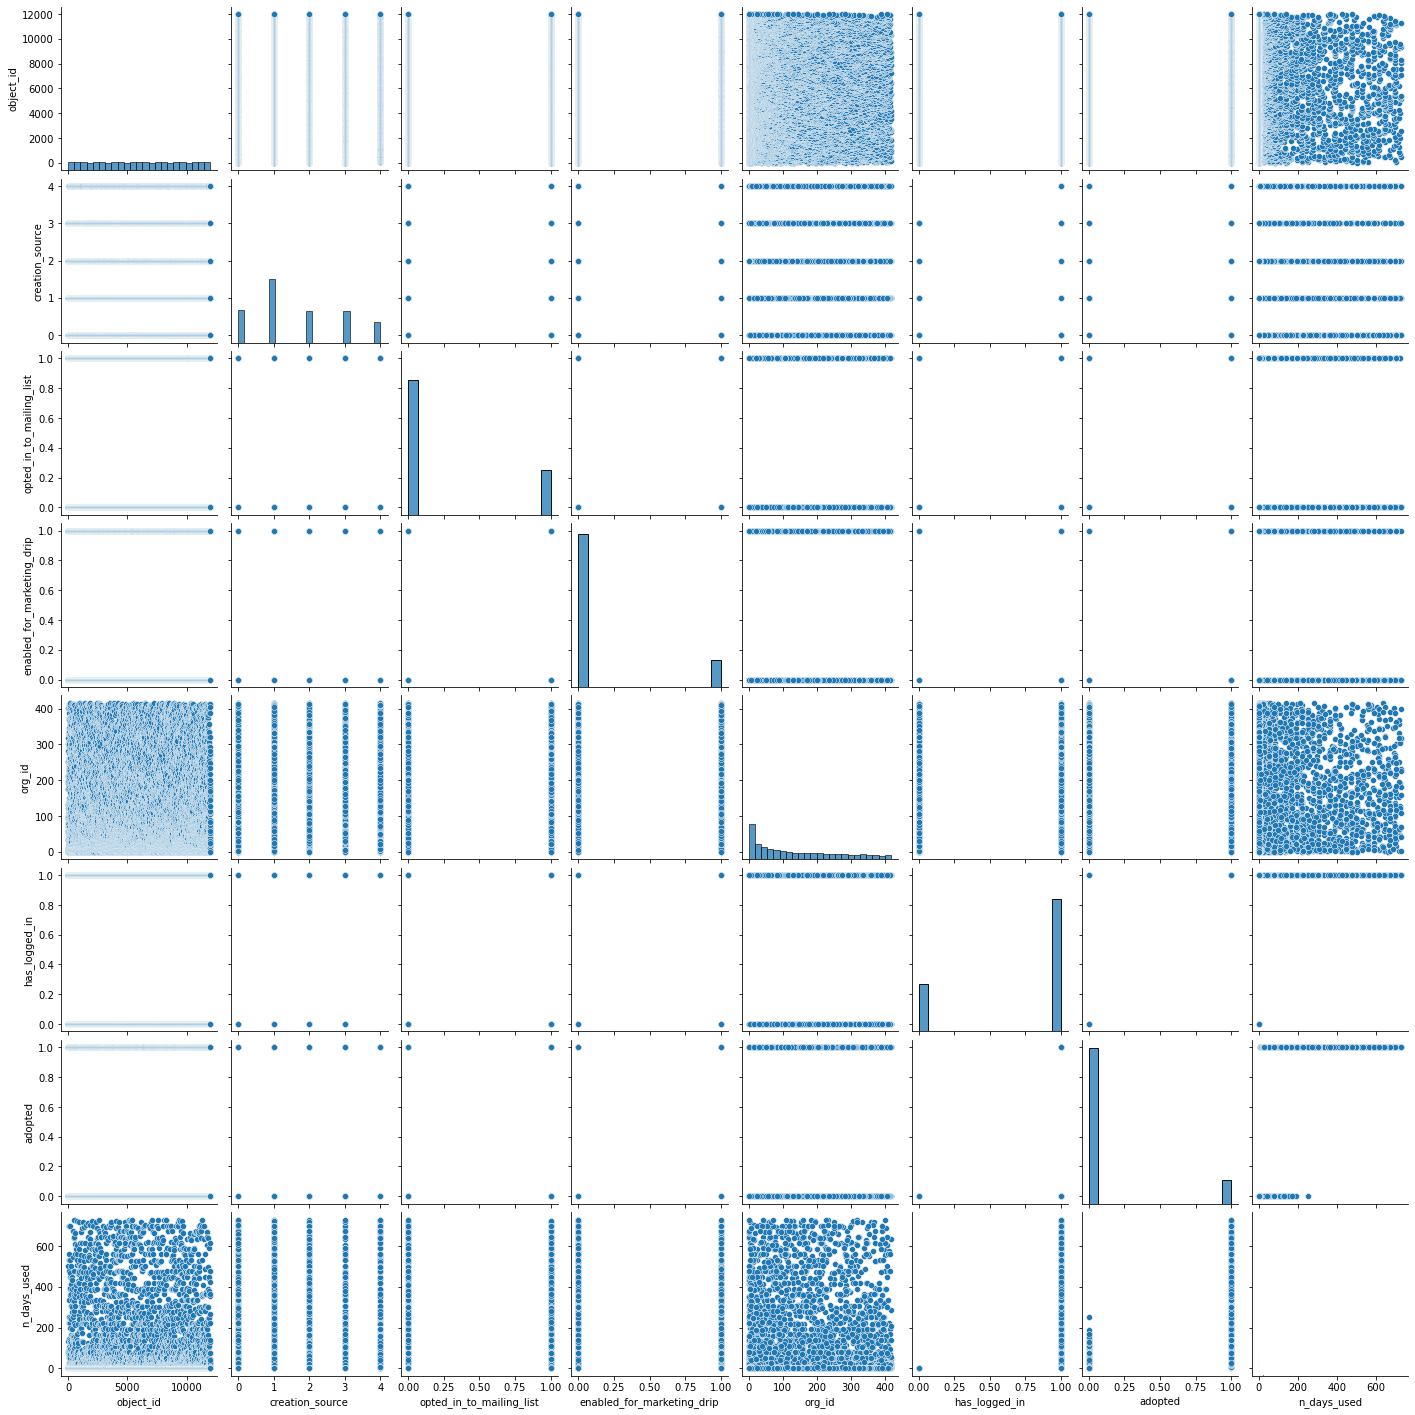

In [137]:
sns.pairplot(user_info)
plt.show()

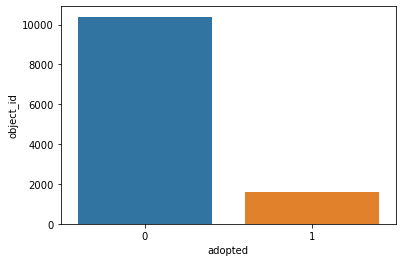

In [166]:
sns.barplot(data=user_info, x='adopted', y='object_id',
           estimator = lambda x: len(x))

plt.show()

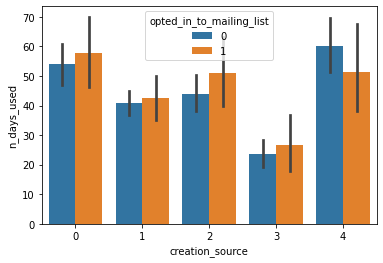

In [141]:
sns.barplot(data=user_info, y='n_days_used', x='creation_source',
           hue='opted_in_to_mailing_list')

plt.show()

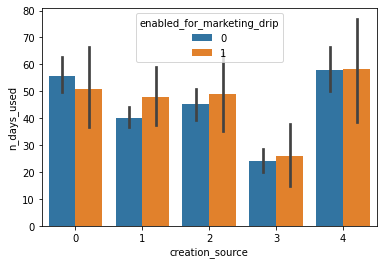

In [151]:
sns.barplot(data=user_info, y='n_days_used', x='creation_source',
           hue='enabled_for_marketing_drip')

plt.show()

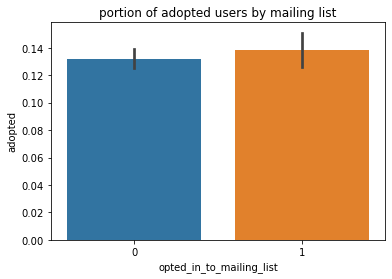

In [159]:
sns.barplot(data=user_info, y='adopted', x='opted_in_to_mailing_list',
           estimator = lambda x: sum(x) / len(x))

plt.title('portion of adopted users by mailing list')

plt.show()

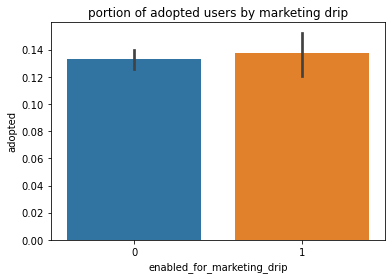

In [158]:
sns.barplot(data=user_info, y='adopted', x='enabled_for_marketing_drip',
           estimator = lambda x: sum(x) / len(x))

plt.title('portion of adopted users by marketing drip')

plt.show()

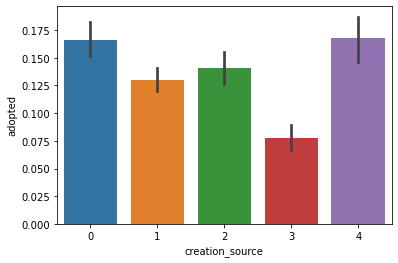

In [161]:
sns.barplot(data=user_info, y='adopted', x='creation_source',
           estimator = lambda x: sum(x) / len(x))

plt.show()

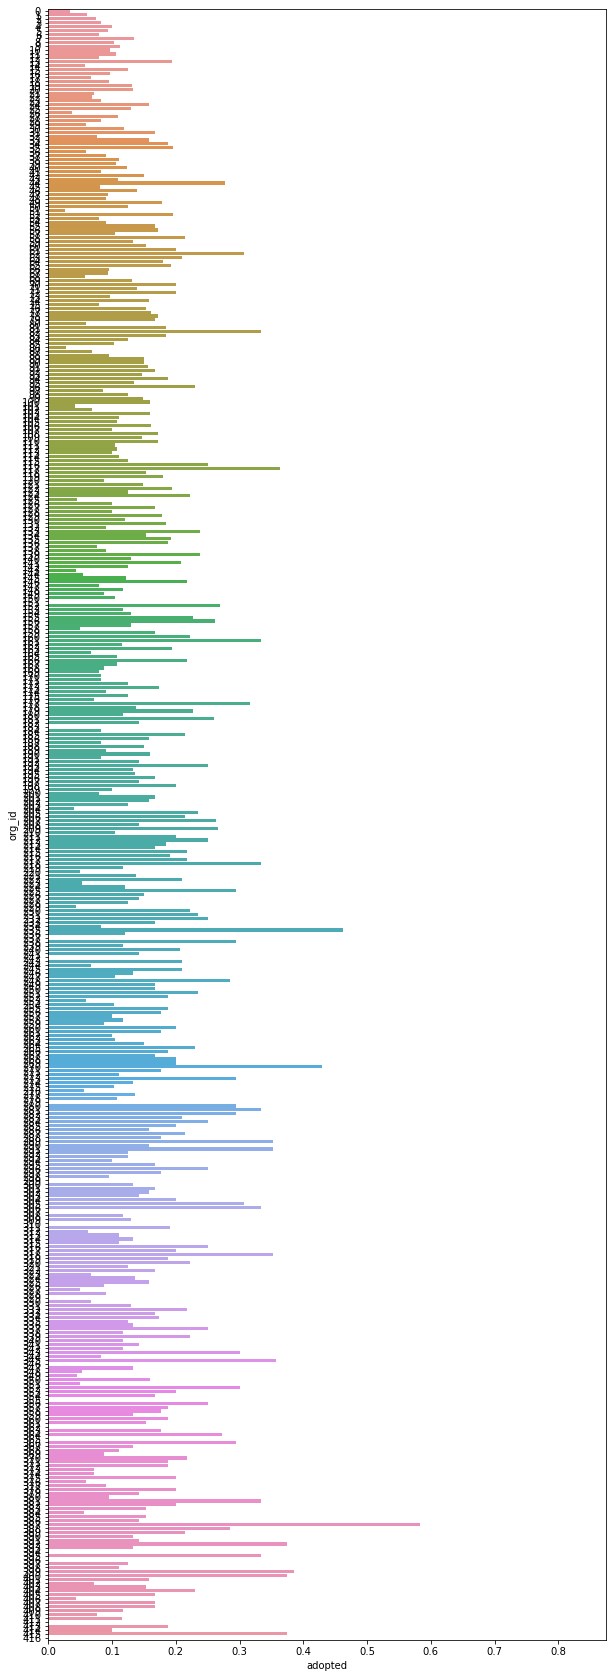

In [170]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(data=user_info, 
            x='adopted', y='org_id',
            orient='h',
           estimator = lambda x: sum(x) / len(x),
           errwidth=0)
plt.show()

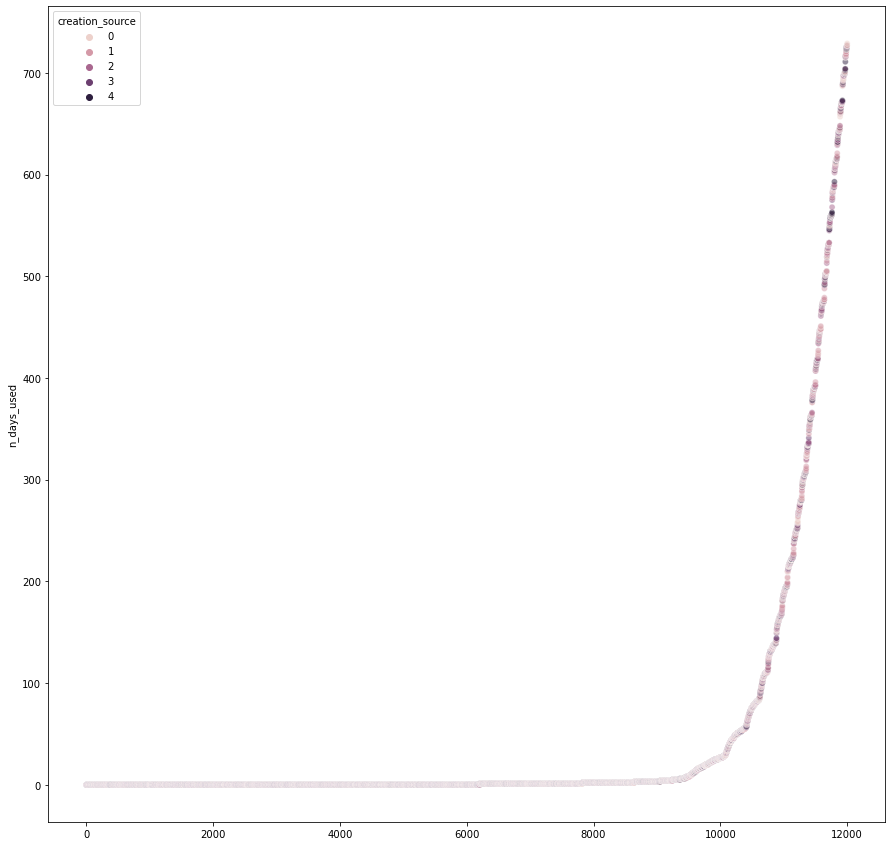

In [150]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(data=user_info.sort_values(by='n_days_used'), y='n_days_used', 
            x=range(len(user_info)),
               hue='creation_source',
                alpha=.5
               )

plt.show()

In [172]:
user_info.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,has_logged_in,adopted,n_days_used
0,1,0,1,0,11,1,0,0.0
1,2,1,0,0,1,1,1,136.0
2,3,1,0,0,94,1,0,0.0
3,4,0,0,0,1,1,0,1.0
4,5,0,0,0,193,1,0,5.0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = user_info.drop(columns=['object_id', 'adopted', 'n_days_used'])
y = user_info['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [178]:
rf = RandomForestClassifier(max_depth = 3, n_jobs=-1)
clf = rf.fit(X_train, y_train)

In [179]:
clf.score(X_train, y_train)

0.8640625

In [180]:
y_pred = clf.predict(X_train)

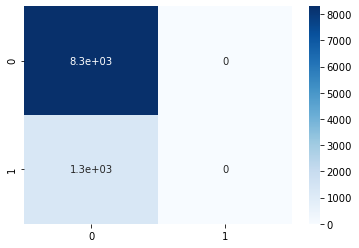

In [181]:
cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, annot=True,cmap ='Blues')
plt.show()

In [194]:
cm

array([[8295,    0],
       [1305,    0]], dtype=int64)

Well that's extremely bad. 

This data is extremely imbalanced so I think I will have to subsample it.

In [42]:
from sklearn.utils import resample

In [182]:
y_train.value_counts()

0    8295
1    1305
Name: adopted, dtype: int64

In [45]:
false_ind = y_train[y_train.values==0].index
true_ind = y_train[y_train.values==1].index

In [199]:
depths = [5,10,15]

n_boots = 50

scores_dict = {}
conf_mats_dict = {}
for depth in depths:
    scores = []
    conf_mats = []
    for n in range(n_boots):
        inds_for_boot = resample(false_ind, n_samples=len(true_ind)).append(true_ind)
        X_df = X_train.loc[inds_for_boot]
        y_df = y_train.loc[inds_for_boot] 
    
        rf = RandomForestClassifier(max_depth = depth, n_jobs=-1)
        clf = rf.fit(X_df, y_df)

        score = clf.score(X_df, y_df)
        scores.append(score)

        y_pred = clf.predict(X_df)
        cm = confusion_matrix(y_df,y_pred)
        conf_mats.append(cm)
        
    scores_dict[depth] = scores
    conf_mats_dict[depth] = conf_mats
    

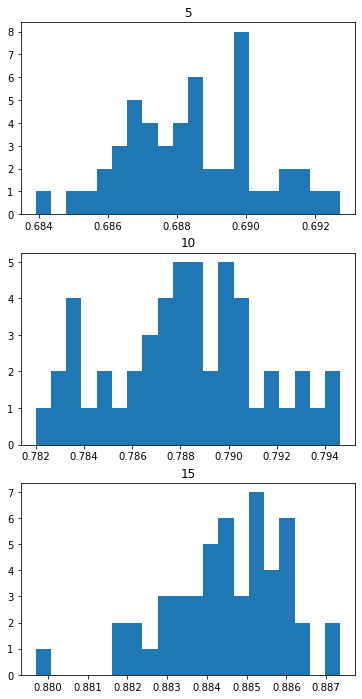

In [208]:
fig, ax = plt.subplots(3,1, figsize=(6, 12))
for n, key in enumerate(scores_dict.keys()):
    ax[n].hist(scores_dict[key], bins=20)
    ax[n].set_title(key)
plt.show()

In [222]:
depth_15_cm = np.array(conf_mats_dict[15]).mean(axis=0)
depth_15_cm

array([[1101.62,  203.38],
       [  98.54, 1206.46]])

In [224]:
np.array(scores_dict[15]).mean()

0.8843218390804597

In [225]:
depths = [15, 20, 25]

n_boots = 50

scores_dict = {}
conf_mats_dict = {}
for depth in depths:
    scores = []
    conf_mats = []
    for n in range(n_boots):
        inds_for_boot = resample(false_ind, n_samples=len(true_ind)).append(true_ind)
        X_df = X_train.loc[inds_for_boot]
        y_df = y_train.loc[inds_for_boot] 
    
        rf = RandomForestClassifier(max_depth = depth, n_jobs=-1)
        clf = rf.fit(X_df, y_df)

        score = clf.score(X_df, y_df)
        scores.append(score)

        y_pred = clf.predict(X_df)
        cm = confusion_matrix(y_df,y_pred)
        conf_mats.append(cm)
        
    scores_dict[depth] = scores
    conf_mats_dict[depth] = conf_mats
    

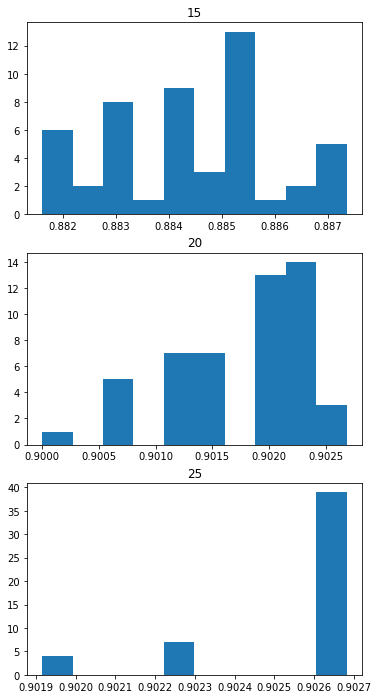

In [227]:
fig, ax = plt.subplots(3,1, figsize=(6, 12))
for n, key in enumerate(scores_dict.keys()):
    ax[n].hist(scores_dict[key], bins=10)
    ax[n].set_title(key)
plt.show()

In [228]:
np.array(conf_mats_dict[20]).mean(axis=0)

array([[1157.52,  147.48],
       [ 108.94, 1196.06]])

this looks good but I haven't been crossvalidating so there's definitely an overfitting worry here

In [41]:
from sklearn.model_selection import cross_validate

In [64]:
depths = [20,25]


n_boots = 25

scores_dict = {}
# conf_mats_dict = {}
for depth in depths:
    scores = []
#     conf_mats = []
    for n in range(n_boots):
        inds_for_boot = resample(false_ind, n_samples=len(true_ind)).append(true_ind)
        X_df = X_train.loc[inds_for_boot]
        y_df = y_train.loc[inds_for_boot] 
    
        rf = RandomForestClassifier(max_depth = depth, n_jobs=-1)
        
        score = cross_validate(rf, X_df, y_df, cv=3,
                                scoring='accuracy',
                                 return_train_score=True,
                                  n_jobs=-1)
        
#         clf = rf.fit(X_df, y_df)

#         score = clf.score(X_df, y_df)
        scores.append((np.mean(score['train_score']), np.mean(score['test_score'])))

#         y_pred = clf.predict(X_df)
#         cm = confusion_matrix(y_df,y_pred)
#         conf_mats.append(cm)
        
    scores_dict[depth] = scores
#     conf_mats_dict[depth] = conf_mats
    

In [67]:
scores_dict[25]

[(0.9206896551724139, 0.5938697318007663),
 (0.9160919540229884, 0.6168582375478927),
 (0.9218390804597701, 0.6153256704980843),
 (0.9287356321839081, 0.6084291187739463),
 (0.9266283524904214, 0.6241379310344828),
 (0.9174329501915709, 0.6045977011494252),
 (0.917241379310345, 0.6199233716475095),
 (0.9254789272030651, 0.6233716475095785),
 (0.9229885057471264, 0.6134099616858237),
 (0.9203065134099617, 0.6222222222222222),
 (0.9185823754789273, 0.6279693486590038),
 (0.9296934865900384, 0.6436781609195402),
 (0.9208812260536399, 0.6333333333333333),
 (0.9241379310344828, 0.6191570881226053),
 (0.9222222222222222, 0.6160919540229884),
 (0.9201149425287357, 0.6160919540229884),
 (0.917624521072797, 0.5954022988505747),
 (0.9266283524904214, 0.628735632183908),
 (0.9237547892720306, 0.6344827586206896),
 (0.921455938697318, 0.6490421455938697),
 (0.9203065134099617, 0.6272030651340996),
 (0.9170498084291188, 0.6065134099616858),
 (0.9222222222222222, 0.6337164750957854),
 (0.92049808429

this is not getting better

In [43]:
from sklearn.svm import SVC

In [243]:
Cs = [.01, .1, 1, 10, 100]


n_boots = 25

scores_dict = {}
for i,c in enumerate(Cs):
    scores = []
    for n in range(n_boots):
        inds_for_boot = resample(false_ind, n_samples=len(true_ind)).append(true_ind)
        X_df = X_train.loc[inds_for_boot]
        y_df = y_train.loc[inds_for_boot] 
    
        svc = SVC(C=c, random_state=0)
        
        score = cross_validate(svc, X_df, y_df, cv=3,
                                scoring='accuracy',
                                 return_train_score=True,
                                  n_jobs=-1)

        scores.append((np.mean(score['train_score']), np.mean(score['test_score'])))

    scores_dict[i] = scores

In [249]:
train_test_means = {}
for key in scores_dict.keys():
    mean_train = np.mean([n[0] for n in scores_dict[key]])
    mean_test = np.mean([n[1] for n in scores_dict[key]])
    train_test_means[key] = {'train': mean_train,
                            'test': mean_test}

In [250]:
train_test_means

{0: {'train': 0.5306513409961685, 'test': 0.5256704980842912},
 1: {'train': 0.5344827586206897, 'test': 0.5318007662835248},
 2: {'train': 0.5517241379310345, 'test': 0.546360153256705},
 3: {'train': 0.5561302681992336, 'test': 0.5551724137931034},
 4: {'train': 0.6091954022988505, 'test': 0.6022988505747126}}

In [46]:
Cs = [100,150,200]


n_boots = 25

scores_dict = {}
for i,c in enumerate(Cs):
    scores = []
    for n in range(n_boots):
        inds_for_boot = resample(false_ind, n_samples=len(true_ind), random_state=0).append(true_ind)
        X_df = X_train.loc[inds_for_boot]
        y_df = y_train.loc[inds_for_boot] 
    
        svc = SVC(C=c, random_state=0)
        
        score = cross_validate(svc, X_df, y_df, cv=3,
                                scoring='accuracy',
                                 return_train_score=True,
                                  n_jobs=-1)

        scores.append((np.mean(score['train_score']), np.mean(score['test_score'])))

    scores_dict[i] = scores

In [47]:
train_test_means = {}
for key in scores_dict.keys():
    mean_train = np.mean([n[0] for n in scores_dict[key]])
    mean_test = np.mean([n[1] for n in scores_dict[key]])
    train_test_means[key] = {'train': mean_train,
                            'test': mean_test}
    
train_test_means

{0: {'train': 0.6091954022988505, 'test': 0.6022988505747126},
 1: {'train': 0.6503831417624523, 'test': 0.6532567049808431},
 2: {'train': 0.663793103448276, 'test': 0.6624521072796935}}

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF

In [50]:
X.shape

(12000, 5)

In [ ]:
Cs = [100,150,200]

n_boots = 1

scores_dict = {}
for i,c in enumerate(Cs):
    scores = []
    for n in range(n_boots):
        inds_for_boot = resample(false_ind, n_samples=len(true_ind), random_state=0).append(true_ind)
        X_df = X_train.loc[inds_for_boot]
        y_df = y_train.loc[inds_for_boot] 
    
        params = dict('nmf__n_components':[None, 2, 3, 4, 5])
        pipeline = Pipeline([
                            ('nmf', NMF(random_state=0)),
                            ('model', RandomForestClassifier(random_state=0, n_jobs=-1))
                            ])
        
        score = cross_validate(svc, X_df, y_df, cv=3,
                                scoring='accuracy',
                                 return_train_score=True,
                                  n_jobs=-1)

        scores.append((np.mean(score['train_score']), np.mean(score['test_score'])))

    scores_dict[i] = scores

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [63]:


n_boots = 15

scores = []
for n in range(n_boots):
    inds_for_boot = resample(false_ind, n_samples=len(true_ind)).append(true_ind)
    print(inds_for_boot[:10])
    X_df = X_train.loc[inds_for_boot]
    y_df = y_train.loc[inds_for_boot]

    params = {'nmf__n_components':[None, 2, 3, 4, 5],
                 'model__max_depth':[15,20]}
    pipeline = Pipeline([
                        ('nmf', NMF(random_state=0)),
                        ('model', RandomForestClassifier(random_state=0, n_jobs=-1))
                        ])

    gs = GridSearchCV(pipeline, cv=3, n_jobs=-1, param_grid=params)
    search = gs.fit(X_df, y_df)
    
    scores.append((search.best_params_, search.best_score_))
    print(search.best_params_, search.best_score_)
    
    

Int64Index([2104, 5054, 8037, 7668, 8857, 1056, 5454, 476, 3863, 3904], dtype='int64')
{'model__max_depth': 15, 'nmf__n_components': 4} 0.6413793103448276
Int64Index([6407, 8668, 5564, 11916, 456, 3885, 4984, 6624, 5422, 2276], dtype='int64')
{'model__max_depth': 15, 'nmf__n_components': 4} 0.6306513409961686
Int64Index([7778, 3442, 55, 4671, 7565, 1196, 1661, 8269, 8240, 8985], dtype='int64')
{'model__max_depth': 15, 'nmf__n_components': 4} 0.6291187739463602
Int64Index([10664, 8039, 8797, 7187, 1833, 11777, 5015, 939, 70, 10617], dtype='int64')


KeyboardInterrupt: 

In [59]:
scores

[({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4}, 0.6386973180076628),
 ({'model__max_depth': 15, 'nmf__n_components': 4},

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
n_boots = 15

scores = []
for n in range(n_boots):
    inds_for_boot = resample(false_ind, n_samples=len(true_ind)).append(true_ind)
    X_df = X_train.loc[inds_for_boot]
    y_df = y_train.loc[inds_for_boot]

    params = {
             'model__n_neighbors':[5,10,15],
             'model__weights': ['uniform', 'distance'],
             'model__algorithm':['ball_tree', 'kd_tree']}
    pipeline = Pipeline([
                        ('nmf', NMF(random_state=0)),
                        ('model', KNeighborsClassifier(leaf_size=10, n_jobs=-1))
                        ])

    gs = GridSearchCV(pipeline, cv=3, n_jobs=-1, param_grid=params)
    search = gs.fit(X_df, y_df)
    
    scores.append((search.best_params_, search.best_score_))
    

In [71]:
scores

[({'model__algorithm': 'ball_tree',
   'model__n_neighbors': 10,
   'model__weights': 'distance'},
  0.6049808429118774),
 ({'model__algorithm': 'ball_tree',
   'model__n_neighbors': 10,
   'model__weights': 'distance'},
  0.5888888888888889),
 ({'model__algorithm': 'ball_tree',
   'model__n_neighbors': 5,
   'model__weights': 'distance'},
  0.6088122605363985),
 ({'model__algorithm': 'kd_tree',
   'model__n_neighbors': 10,
   'model__weights': 'distance'},
  0.6103448275862068),
 ({'model__algorithm': 'kd_tree',
   'model__n_neighbors': 15,
   'model__weights': 'distance'},
  0.6015325670498085),
 ({'model__algorithm': 'kd_tree',
   'model__n_neighbors': 10,
   'model__weights': 'distance'},
  0.6191570881226053),
 ({'model__algorithm': 'kd_tree',
   'model__n_neighbors': 15,
   'model__weights': 'distance'},
  0.6149425287356323),
 ({'model__algorithm': 'kd_tree',
   'model__n_neighbors': 5,
   'model__weights': 'distance'},
  0.6095785440613027),
 ({'model__algorithm': 'ball_tree',


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
n_boots = 20

scores = []
for n in range(n_boots):
    inds_for_boot = resample(false_ind, n_samples=len(true_ind)).append(true_ind)
    X_df = X_train.loc[inds_for_boot]
    y_df = y_train.loc[inds_for_boot]
    
    params = {'loss': ['deviance', 'exponential'],
             'n_estimators': [150,200,500]}
    gb = GradientBoostingClassifier(learning_rate=.1, random_state=0)
    gs = GridSearchCV(gb, cv=3, n_jobs=-1, param_grid=params)
    
    search = gs.fit(X_df, y_df)
    scores.append((search.best_params_, search.best_score_))

In [79]:
scores

[({'loss': 'deviance', 'n_estimators': 150}, 0.6379310344827586),
 ({'loss': 'deviance', 'n_estimators': 150}, 0.6547892720306513),
 ({'loss': 'deviance', 'n_estimators': 150}, 0.6505747126436782),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6509578544061303),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6521072796934866),
 ({'loss': 'deviance', 'n_estimators': 150}, 0.6513409961685824),
 ({'loss': 'deviance', 'n_estimators': 200}, 0.653639846743295),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6425287356321839),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6532567049808429),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6494252873563219),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.642911877394636),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6398467432950191),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6528735632183907),
 ({'loss': 'exponential', 'n_estimators': 150}, 0.6394636015325671),
 ({'loss': 'exponential', 'n_estimators': 200}, 0.6

In [76]:
#scores from learning rate grid search
scores

[({'learning_rate': 0.1}, 0.6701149425287357),
 ({'learning_rate': 0.1}, 0.6555555555555556),
 ({'learning_rate': 0.1}, 0.6444444444444444),
 ({'learning_rate': 0.1}, 0.6440613026819922),
 ({'learning_rate': 0.1}, 0.6509578544061303),
 ({'learning_rate': 10}, 0.6478927203065133),
 ({'learning_rate': 0.1}, 0.6505747126436782),
 ({'learning_rate': 0.1}, 0.6501915708812261),
 ({'learning_rate': 0.1}, 0.6406130268199234),
 ({'learning_rate': 0.1}, 0.6590038314176246),
 ({'learning_rate': 0.1}, 0.678544061302682),
 ({'learning_rate': 0.1}, 0.6551724137931035),
 ({'learning_rate': 10}, 0.6524904214559387),
 ({'learning_rate': 0.1}, 0.6659003831417625),
 ({'learning_rate': 0.1}, 0.6478927203065133),
 ({'learning_rate': 0.1}, 0.6590038314176245),
 ({'learning_rate': 10}, 0.6505747126436782),
 ({'learning_rate': 0.1}, 0.6440613026819922),
 ({'learning_rate': 0.1}, 0.6478927203065133),
 ({'learning_rate': 10}, 0.6570881226053641)]

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
gb = GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=150, random_state=0)
clf = gb.fit(X_train, y_train)
# y_pred = clf.predict(X_train)

In [86]:
y_pred = clf.predict(X_test)

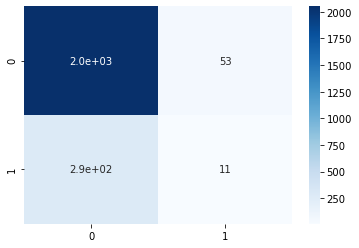

In [87]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap ='Blues')
plt.show()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2103
           1       0.17      0.04      0.06       297

    accuracy                           0.86      2400
   macro avg       0.52      0.51      0.49      2400
weighted avg       0.79      0.86      0.82      2400



In [90]:
gb.feature_importances_

array([0.15375475, 0.03712214, 0.04884578, 0.40269854, 0.35757879])

In [91]:
X_train.columns

Index(['creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'has_logged_in'],
      dtype='object')

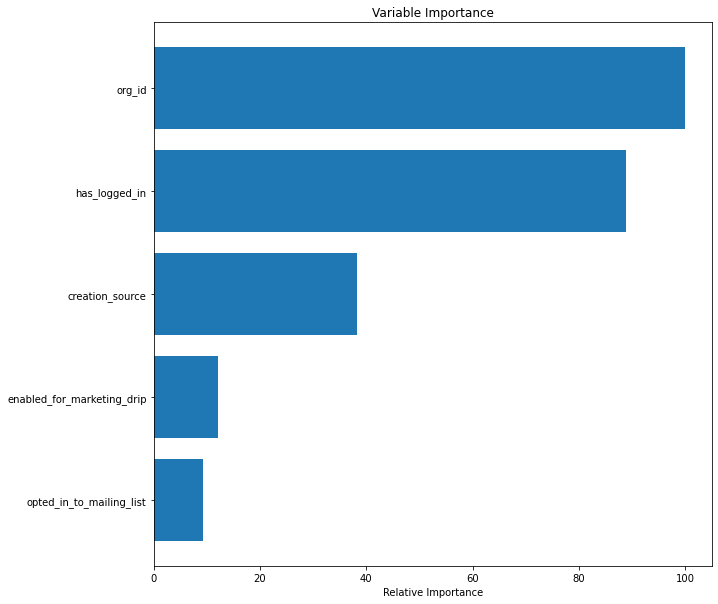

In [93]:
feature_importance = gb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()